In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir = r'/content/drive/MyDrive/Colab Notebooks/Osteoarthritis_Assignment_dataset/train'
validation_dir = r'/content/drive/MyDrive/Colab Notebooks/Osteoarthritis_Assignment_dataset/Valid'
test_dir =r'/content/drive/MyDrive/Colab Notebooks/Osteoarthritis_Assignment_dataset/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2350 images belonging to 2 classes.
Found 641 images belonging to 2 classes.


In [ ]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
# conv_base.trainable = False

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=32,
      callbacks=[checkpoint_cb])

<ipython-input-16-f5d73a21cae5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 [==============================] - 855s 8s/step - loss: 1.3833 - acc: 0.6246 - val_loss: 513.6125 - val_acc: 0.6734
Epoch 2/10
100/100 [==============================] - 452s 5s/step - loss: 0.5779 - acc: 0.6879 - val_loss: 1.4591 - val_acc: 0.6734
Epoch 3/10
100/100 [==============================] - 456s 5s/step - loss: 0.4284 - acc: 0.8065 - val_loss: 2.3319 - val_acc: 0.7422
Epoch 4/10
100/100 [==============================] - 454s 5s/step - loss: 0.4351 - acc: 0.8240 - val_loss: 1.1150 - val_acc: 0.7719
Epoch 5/10
100/100 [==============================] - 471s 5s/step - loss: 0.4257 - acc: 0.8146 - val_loss: 2.1928 - val_acc: 0.6297
Epoch 6/10
100/100 [==============================] - 467s 5s/step - loss: 0.3794 - acc: 0.8291 - val_loss: 0.8554 - val_acc: 0.8313
Epoch 7/10
100/100 [==============================] - 466s 5s/step - loss: 0.3473 - acc: 0.8583 - val_loss: 0.3425 - val_acc: 0.9141
Epoch 8/10
100/100 [==============================] - 467s 5s/step 

Now you can test this model on any knee x-ray image you want and find out whether the image is of a healthy person or a person with Osteoarthritis condition.

For that, you have to import the libraries given below.

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

Enter the location of the previously saved model and load it using the keras.models.load_model command.

In [ ]:
model = keras.models.load_model('/content/CNN_Project_Model-10.h5')

Enter the location of knee x - ray image that you wants to test and load the image.

Use model.predict to predict the output.

The output of this block of code will be the probability of the patient having osteoarthritis. Closer is the value to 1, higher the chances of having osteoarthritis.

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Osteoarthritis_Assignment_dataset/train/Osteoarthritis/9000099R.png',target_size=(150,150))

x=image.img_to_array(img)

import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#img_data.shape
#print(img_data)
Probability = model.predict(img_data)

print(Probability)


1/1 [==============================] - 0s 135ms/step
[[0.99772066]]


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 845 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator)

43/43 [==============================] - 128s 3s/step - loss: 6.5724 - acc: 0.3775


[6.572447776794434, 0.3775147795677185]

In [ ]:
prob = model.predict(test_generator)
print(prob)

43/43 [==============================] - 38s 885ms/step
[[7.03102568e-15]
 [9.99989748e-01]
 [9.99991298e-01]
 [9.69217479e-01]
 [9.99999940e-01]
 [1.15973887e-03]
 [7.64287233e-01]
 [9.80197012e-01]
 [9.99993861e-01]
 [9.99039531e-01]
 [7.48380423e-01]
 [2.43317075e-21]
 [9.97622192e-01]
 [1.00000000e+00]
 [9.99791980e-01]
 [1.94629923e-01]
 [9.83060598e-01]
 [9.62384224e-01]
 [9.46041524e-01]
 [9.97470856e-01]
 [9.98944104e-01]
 [9.99982178e-01]
 [9.99999821e-01]
 [9.99996305e-01]
 [9.96275723e-01]
 [9.99998450e-01]
 [9.99210238e-01]
 [9.99900579e-01]
 [3.45576495e-01]
 [8.66335511e-01]
 [1.00000000e+00]
 [9.65689063e-01]
 [3.28911901e-01]
 [9.81429935e-01]
 [9.99999702e-01]
 [4.92767572e-01]
 [2.38309399e-13]
 [9.75632250e-01]
 [2.72238553e-01]
 [9.99998331e-01]
 [9.92465734e-01]
 [9.99998510e-01]
 [7.55697727e-01]
 [1.00000000e+00]
 [9.99917269e-01]
 [9.99933660e-01]
 [1.12910375e-05]
 [5.32500508e-07]
 [1.00000000e+00]
 [3.47019231e-21]
 [9.93234098e-01]
 [9.31550980e-01]
 [9.9683

In [ ]:
if prob[2][0]<=0.5:
    out = "Diseased"
    probab = 100*(1-prob)
    remedy = "Apply sulfur sprays or copper-based fungicides weekly at first sign of disease to prevent its spread."
    print(remedy)
else:
    out = "Healthy"
    probab = 100*prob
    remedy = " "
    print(remedy)

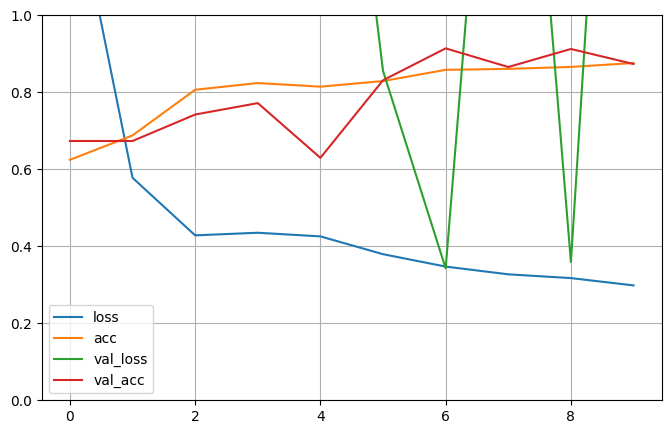

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()